# Análise Exploratória de Dados

In [11]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#d60202", "#0a2054", "#FF7A00"]
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Leitura do Conjunto de Dados

In [2]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. Descrição do Dados

![Imagem ilustrativa](https://www.self.inc/info/img/post/waitstaff-tipping-survey/waitstaff-tipping-survey-header.jpg)


[tips: Tipping Data](https://rdrr.io/cran/reshape2/man/tips.html) é um conjunto de dados com informações sobre as gorjetas que um garçom recebeu durante algunss meses trabalhando em um restaurante.

 

## 2.1 Dicionário de Dados

In [3]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,total_bill,valor total da conta em dólares,quantitativa,continua
1,tip,valor da gorjeta em dólares,quantitativa,continua
2,sex,sexo do cliente,qualitativa,nominal
3,smoker,se o cliente fuma,qualitativa,nominal
4,day,dia da semana,qualitativa,ordinal
5,time,horario,qualitativa,ordinal
6,size,pessoas na mesa,quantitativa,discreta


---
##### São 7 variáveis, sendo 2 Qualitativas Nominais, 2 Qualitativas Ordinais, 2 Quantitativas Contínuas e 1 Quantitativa Discreta.
---

# Dados Faltantes

In [65]:
dados_faltantes = df.isnull().sum()
display(dados_faltantes)
display(Markdown(

    "---\n"
    "##### A partir dessa informação, identificamos que o conjunto de dados não contém valores faltantes.\n"
    "---\n"
))

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

---
##### A partir dessa informação, identificamos que o conjunto de dados não contém valores faltantes.
---


# Perguntas de Partida e Hipóteses


- Qual a distribuição dos dados (variável por variável)?
- O horário influencia a gorjeta?
- O dia da semana influencia a gorjeta?
- O tamanho da mesa influencia a gorjeta?
- Homens e Mulheres costumam dar gorjetas diferentes?

### Qual a distribuição dos dados (variável por variável)?

Iniciaremos com as estatísticas descritivas e com as visualizações das distribuições em seguida.

In [5]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


---
- O dia da semana em que há mais gorjetas é **Sábado**.
- O sexo **Masculino** dá o maior número de gorjetas.
- O horário com maior ocorrência de gorjetas é o **Jantar**.
- As gorjetas variam entre **1** e **10** dólares, sendo **2,99** a média.
- A maioria dos clientes **não** é fumante.
- O número de pessoas na mesa varia entre **1** e **6** pessoas.
---

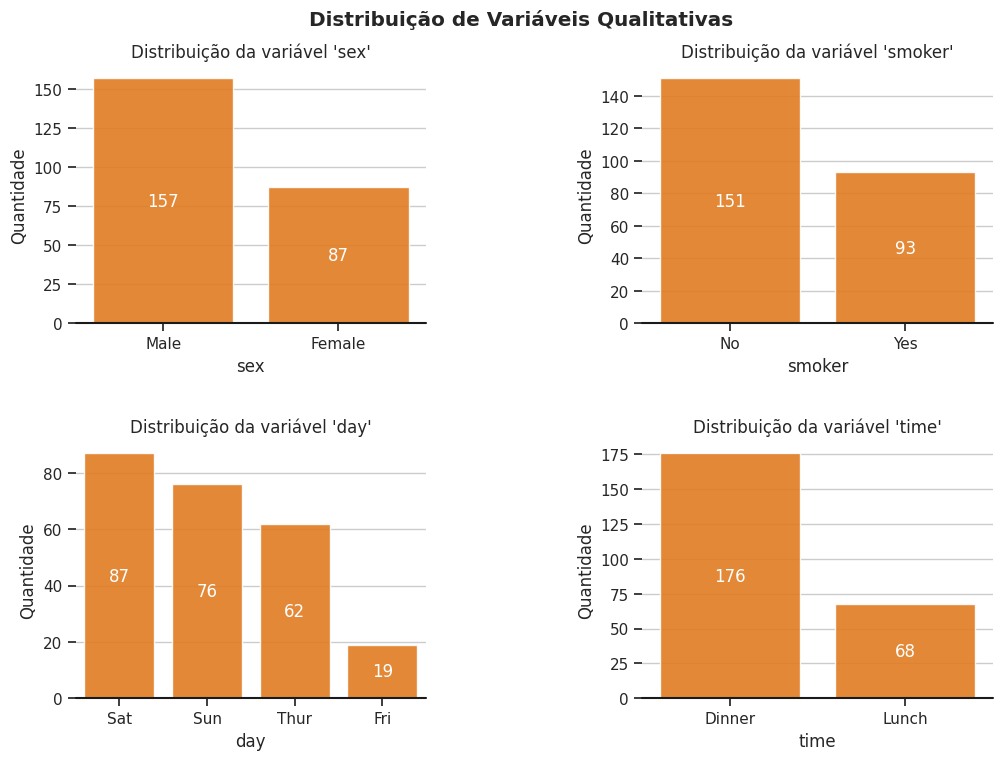

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(11,8))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de Variáveis Qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[2],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

---
Total de Participantes da Pesquisa: 244
- Há mais clientes do sexo Masculino do que do sexo Feminino, sendo, aproximadamente, 64% de homens e 36% de mulheres.
- Há predominância de pessoas que não são fumantes, sendo elas cerca de 61% do total de participantes.
- Sábado é o dia da semana com mais gorjetas, seguido de Domingo, Quinta e Sexta, nessa ordem.
- O horário com mais gorjetas é o Jantar. Nele, ocorre a prevalência de 72% do total  de gorjetas.
---

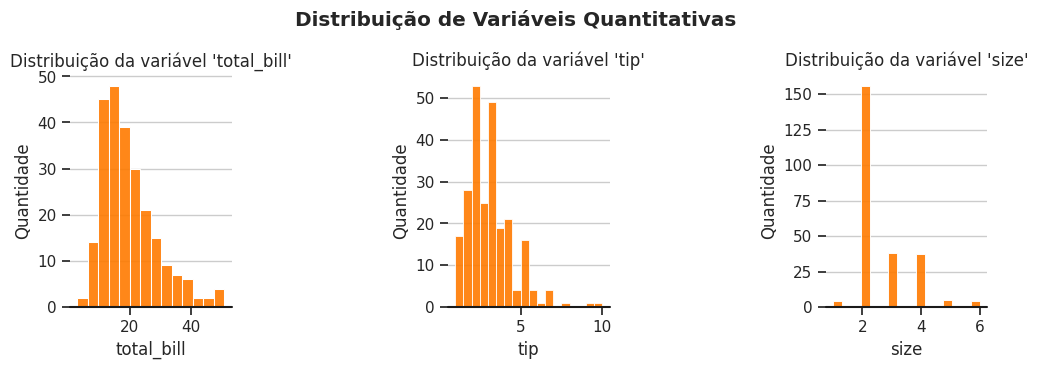

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(11,4))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de Variáveis Quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[2],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

---
Total de Participantes da Pesquisa: 244
- Predominantemente, o Total de Contas varia entre ```U$ 12.50```  e ```U$20.00```.
- Grande parte das gorjetas permanece entre ```U$ 1.50``` e ```U$ 3.00```, sendo ```U$ 3.00``` a Moda.
- A Moda do Tamanho da Mesa (n° de pessoas) é 2.
---

### O horário influencia o valor da gorjeta?

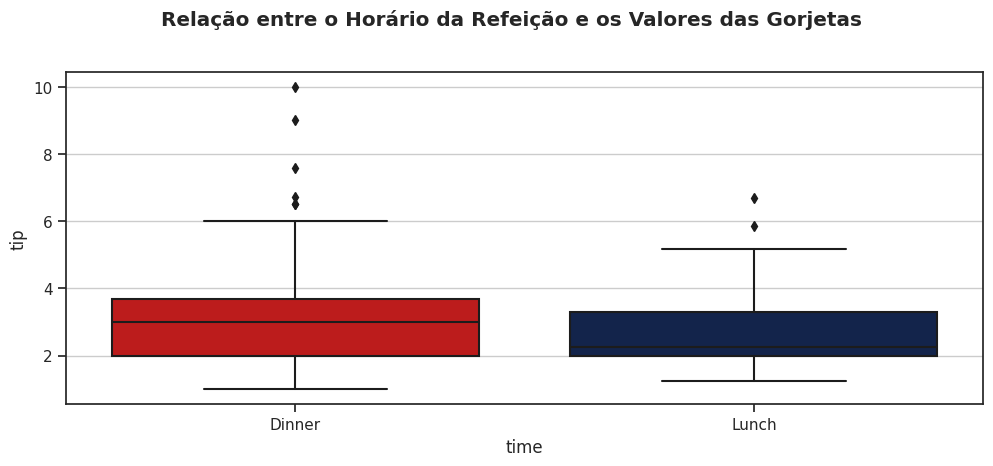

In [73]:
fig, ax = plt.subplots(figsize=(11, 5))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre o Horário da Refeição e os Valores das Gorjetas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa' and variavel == 'tip'").variavel.to_list()):
    ax = sns.boxplot(
        x="time", 
        y=variavel,  
        data=df, 
        ax=ax
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
plt.show()

---
- No Jantar, as gorjetas são melhores, havendo mais outliers (valores fora do comum) que, nesse caso, são positivos.
---

### O dia da semana influencia o valor da gorjeta?


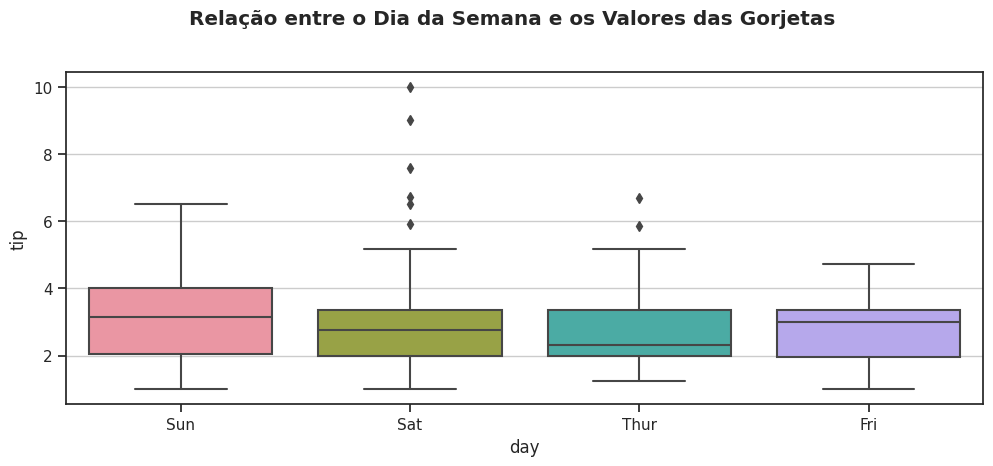

In [71]:
fig, ax = plt.subplots(figsize=(11, 5))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre o Dia da Semana e os Valores das Gorjetas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa' and variavel == 'tip'").variavel.to_list()):
    ax = sns.boxplot(
        x="day", 
        y=variavel,  
        data=df, 
        ax=ax
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
plt.show()

---
- No Domingo, há as gorjetas de maior valor monetário.
- No Sábado, há a maior ocorrência de outliers.
---

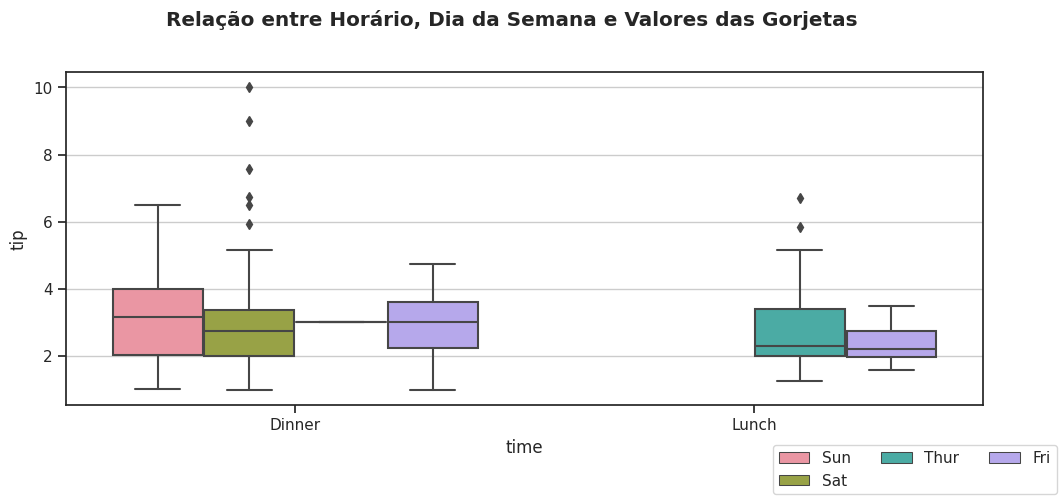

In [63]:
fig, ax = plt.subplots(figsize=(11, 5))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre Horário, Dia da Semana e Valores das Gorjetas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa' and variavel == 'tip'").variavel.to_list()):
    ax = sns.boxplot(
        x="time", 
        y=variavel,
        hue="day",
        data=df, 
        ax=ax
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower right', ncol=3)
plt.show()

---
- Há gorjetas durante o Jantar, na Sexta, no Sábado e no Domingo. 
- Durante o almoço, há gorjetas na Quinta e na Sexta.
- O momento com mais outliers é o Jantar de Sábado.
- O momento com as maiores gorjetas é o Jantar de Domingo.
---

### O tamanho da mesa influencia o valor da gorjeta?

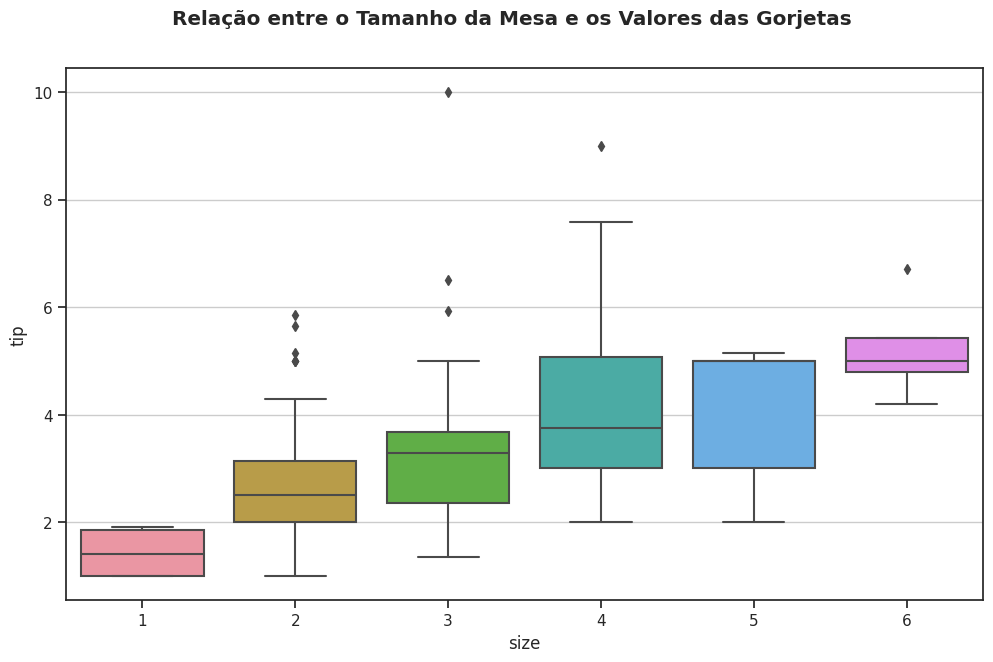

In [70]:
fig, ax = plt.subplots(figsize=(11, 7))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre o Tamanho da Mesa e os Valores das Gorjetas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa' and variavel == 'tip'").variavel.to_list()):
    ax = sns.boxplot(
        x="size", 
        y=variavel,
        data=df, 
        ax=ax
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
plt.show()

---
- Há uma tendência de aumento das gorjetas em relação ao tamanho das mesas até as mesas de 4 pessoas. Depois, há uma estagnação e um declínio. 
- Há a prevaLência de outliers nas mesas com 2 e 3 pessoas.
- As mesas com 4 pessoas são as que dão maiores gorjetas.
- As mesas com apenas 1 pessoa são as que dão as menores gorjetas.
---

### Homens e mulheres costumam dar gorjetas diferentes?

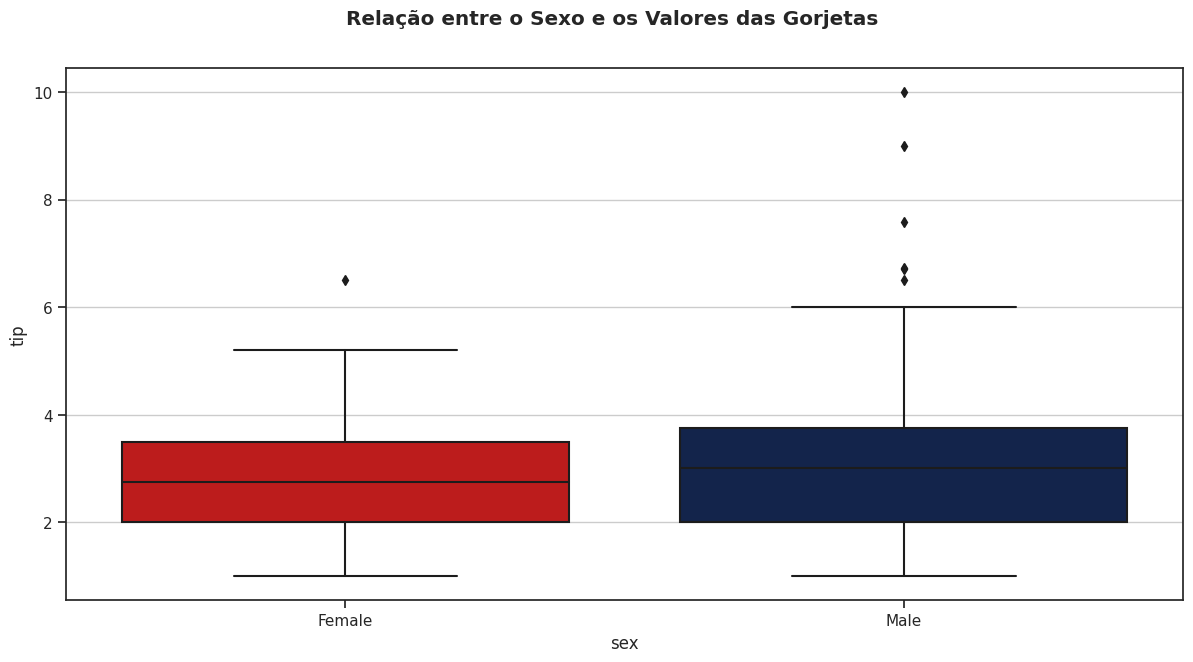

In [75]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre o Sexo e os Valores das Gorjetas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa' and variavel == 'tip'").variavel.to_list()):
    ax = sns.boxplot(
        x="sex", 
        y=variavel, 
        data=df, 
        ax=ax
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
plt.show()

---
- Homens dão gorjetas maiores. 
- Verifica-se mais outliers no conjunto de gorjetas dadas pelos  homens.
---

# Insights

##### Com a ajuda das visualizações e do dicionário de dados criados, as informações mais relevantes que conseguimos adquirir são:
    - Há, predominantemente, clientes do sexo Masculino.
    - Homens gastam mais dinheiro do que Mulheres em gorjetas.
    - Sábado é o dia com maior número de gorjetas e outliers.
    - No Jantar há mais gorjetas e elas são de maior valor monetário.
    - As mesas que pagam as maiores gorjetas são as de 4 pessoas, mas as de  2 pessoas apresentam mais  outliers.

# Resultados

Não são tiradas conclusões acerca dos dados e/ou visualizações apresentados. 
Para isso, seria necessário o auxílio de um especialista para aplicação dessas informações.